#### KARIMUNDA KALIMU | Ph.D. student at the University of South Bohemia_cz | Department of Technology and Cybernetics | +420721095472

# Machine learning internship program at Cognifyz technologies
* Cognifyz Technologies is a leading technology company that
 specializes in the dynamic field of data science and excels in
 delivering impactful projects and solutions.
* The company offers a wide range of products and services,
 including artificial intelligence (AI), machine learning (ML), and
 data analytics tools.
* Cognifyz Technologies also provides training programs to
 enhance skills and knowledge in these areas.
* The company focuses on delivering innovative and cutting-edge
 solutions to meet the evolving needs of businesses


# Task 1: Predict Restaurant Ratings
In this first task, I will develop a machine learning model that forecasts a restaurant's aggregate rating using some relevant features.
The process will involve several steps:  
* First, I will preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.
* Next, I will choose 5 widely used regression algorithms, such as linear and decision tree regression, and train them on the training data.
* After that, I will evaluate their performance using appropriate regression metrics on the testing data, such as mean squared error and R-squared.
*  Finally, I will interpret the best model's results and analyze the most influential features affecting restaurant ratings.

In [2]:
# I will start by importing some libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [3]:
# Load the dataset
restaurant_df = pd.read_csv('D:/Cognifyz internship/Dataset_Cog_int.csv')
restaurant_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Step 1. data preprocessing
On this step I will do 4 things: 
* Understanding the dataset
* Handling missing values
* Encoding categorical variables
* Splitting the data into training(80%) and testing(20%) datasets.

In [4]:
# showing the shape and culumns names of the datasets

print(f"the shape of the dataset is: {restaurant_df.shape}")
print(f"the column's names are: \n {restaurant_df.columns}")

the shape of the dataset is: (9551, 21)
the column's names are: 
 Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


The dataset contains 9551 rows and 21 columns. And since I am going to build a model to predict restaurant rating, `Aggregate rating` will be my target column

In [5]:
# Showing all the rating values to see if some invalid values exist in the target variable.

mm = restaurant_df["Aggregate rating"].unique()
nn = restaurant_df["Aggregate rating"].dtype
mm, nn

(array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
        3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
        2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9]),
 dtype('float64'))

It is clear that the target variable contains valid float values within the range of 0 to 5. The maximum value recorded is 4.9, while the minimum value is 0.

In [6]:
# showing the basic information of the dataset

restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
restaurant_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


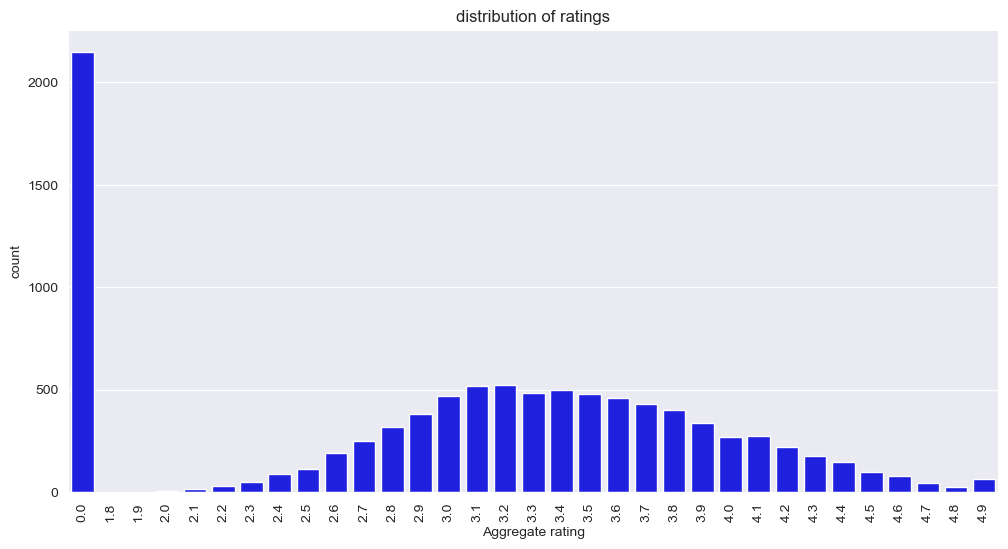

In [8]:
# Plotting the Target data distribution

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

ratings = restaurant_df['Aggregate rating'].value_counts()
plt.figure(figsize=(12,6))
plt.xticks(rotation= 90)
plt.yticks(rotation= 0)
plt.title('distribution of ratings')

sns.barplot(ratings, color='blue');
plt.show()

The distribution of `aggregate ratings` reveals a significant concentration of restaurants with a rating of 0. I think this could be due to data collected from rural or less developed areas where restaurants operate traditionally and may lack the resources or infrastructure necessary to achieve ratings.

In [9]:
restaurant_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

It is clear that only `Cuisines` has 9 missing values. Since they are very few, we can drop them.

In [10]:
restaurant_df_clean = restaurant_df.dropna(subset=['Cuisines']).copy()
restaurant_df_clean.reset_index(drop=True, inplace=True)
print(restaurant_df_clean.isnull().sum())
print(f"the shape before handling missing values: {restaurant_df.shape}")
print(f"the shape after handling missing values: {restaurant_df_clean.shape}")

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
the shape before handling missing values: (9551, 21)
the shape after handling missing values: (9542, 21)


### 1.1 Select which features have high impact on rating aggragation and and create target variable

In [11]:
# selecting relevant features and target variable

relevant_features = ['City', 'Cuisines', 'Average Cost for two', 'Has Table booking','Has Online delivery', 
                     'Is delivering now', 'Price range', 'Votes']
target = ['Aggregate rating']

In [12]:
# feature selection

restaurant_relevant_features = restaurant_df_clean[relevant_features].copy()
print(f"shape after feature selection: {restaurant_relevant_features.shape}")
print(f"columns after feature selection: \n {restaurant_relevant_features.columns}")

shape after feature selection: (9542, 8)
columns after feature selection: 
 Index(['City', 'Cuisines', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range', 'Votes'],
      dtype='object')


In [13]:
restaurant_relevant_features.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   City                  9542 non-null   object
 1   Cuisines              9542 non-null   object
 2   Average Cost for two  9542 non-null   int64 
 3   Has Table booking     9542 non-null   object
 4   Has Online delivery   9542 non-null   object
 5   Is delivering now     9542 non-null   object
 6   Price range           9542 non-null   int64 
 7   Votes                 9542 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 596.5+ KB


In [14]:
# differenciating categorical features to numerical features for further preprocessing

categorical_features = ['City', 'Cuisines', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu']
numerical_features = ['Average Cost for two','Price range', 'Votes']

### 1.2 Now it is time for categorical encoding
In structured datasets, we often encounter a mix of numerical and categorical data. Since most machine learning algorithms require numerical input, we use categorical encoding to transform text-based categories into numerical values. This essential preprocessing step enables algorithms to mathematically analyze and learn from categorical variables.

In [15]:
# encoding categorical features

from sklearn.preprocessing import LabelEncoder

label_encoder = {}
for values in categorical_features:
    if values in restaurant_relevant_features:
        le = LabelEncoder()
        restaurant_relevant_features[values] = le.fit_transform(restaurant_relevant_features[values])
        label_encoder[values] = le

In [16]:
# Checking the information to see if all the datatypes are numeric

restaurant_relevant_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   City                  9542 non-null   int32
 1   Cuisines              9542 non-null   int32
 2   Average Cost for two  9542 non-null   int64
 3   Has Table booking     9542 non-null   int32
 4   Has Online delivery   9542 non-null   int32
 5   Is delivering now     9542 non-null   int32
 6   Price range           9542 non-null   int64
 7   Votes                 9542 non-null   int64
dtypes: int32(5), int64(3)
memory usage: 410.1 KB


wooow! now all the data are numeric, which are suitable for machine learning algorithms

### 1.3 Now I am going to perform feature scaling of numerical features
**Feature scaling** is a technique used to standardize the range of independent features in a dataset, bringing them to a comparable scale. It ensures that all features are brought to a similar scale and range, a process referred to as `feature normalization`. This is crucial because the size of features can influence many machine learning algorithms. Without scaling, larger scale features might dominate smaller ones and disproportionately affect the results. many machine learning algorithms can converge much faster when features are scaled.

In [17]:
# feature scaling by using Standardscaler method

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
restaurant_relevant_features[numerical_features] = scalar.fit_transform(restaurant_relevant_features[numerical_features])

### 1.4 Splitting the data into training and testing sets.

In [18]:
# splitting step

from sklearn.model_selection import train_test_split

X = restaurant_relevant_features.copy()
y = restaurant_df_clean[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_test.shape, y_test.shape

((1909, 8), (1909, 1))

In [20]:
# Displaying all the shapes

print(f"The shape of features before split: {X.shape}")
print(f"The shape of target before split: {y.shape}")
print(f"The shape of training data, X: {X_train.shape}")
print(f"The shape of training data, y: {y_train.shape}")
print(f"The shape of testing data, X: {X_test.shape}")
print(f"the shape of testing data, y: {y_test.shape}")

The shape of features before split: (9542, 8)
The shape of target before split: (9542, 1)
The shape of training data, X: (7633, 8)
The shape of training data, y: (7633, 1)
The shape of testing data, X: (1909, 8)
the shape of testing data, y: (1909, 1)


## Step 2. Building the model
The goal of this step is to develop a predictive model for addressing the regression problem at hand. Given the uncertainty regarding optimal algorithm selection, I will implement multiple regression techniques. Specifically, five widely-used regression algorithms will be employed to build predictive models, followed by a comparative analysis of their performance metrics. This systematic evaluation will facilitate the identification of the most suitable algorithm for predicting the aggregate rating of a restaurant.

### 2.0 Linear Regression
Linear regression is one of the simplest and most commonly used algorithms for predictive modeling. It establishes a relationship between the input features (independent variables) and a continuous target variable (dependent variable) by fitting a linear equation to observed data.

In [21]:
# Import required libraries
from sklearn.linear_model import LinearRegression

# initialize the model
model_linear = LinearRegression()

# Train the model
model_linear.fit(X_train, y_train)


# Make prediction
y_pred = model_linear.predict(X_test)

### 2.1 Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

# initialize the model
model_dtree = DecisionTreeRegressor(random_state=40)

# Train the model
model_dtree.fit(X_train, y_train)

# Make prediction
y_pred = model_dtree.predict(X_test)

### 2.2 Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model
y_train2 = y_train.values.ravel()
model_rf.fit(X_train, y_train2)

# Make predictions on the test set
y_pred = model_rf.predict(X_test)

### 2.3 K-Nearest Neighbors Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
model_knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
model_knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_knn.predict(X_test)

### 2.4 AdaBoost Regressor

In [25]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the model
model_adb = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model_adb.fit(X_train, y_train2)

# Predict and evaluate
y_pred = model_adb.predict(X_test)

## Step 3. Models evaluation
This step involves model testing and compare the reselts to see which regression algorithm has the best results

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

models = [model_linear, model_dtree, model_rf, model_knn, model_adb]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'AdaBoost']

results = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({'Model': name, 'MSE': mse, 'R²': r2, 'MAE': mae, 'RMSE': rmse})

# Displaying results
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)


                 Model       MSE        R²       MAE      RMSE
0    Linear Regression  1.601659  0.300596  1.039241  1.265567
1        Decision Tree  0.186796  0.918431  0.279666  0.432199
2        Random Forest  0.103454  0.954824  0.212773  0.321643
3  K-Nearest Neighbors  0.826550  0.639066  0.586265  0.909148
4             AdaBoost  0.130767  0.942897  0.247338  0.361617


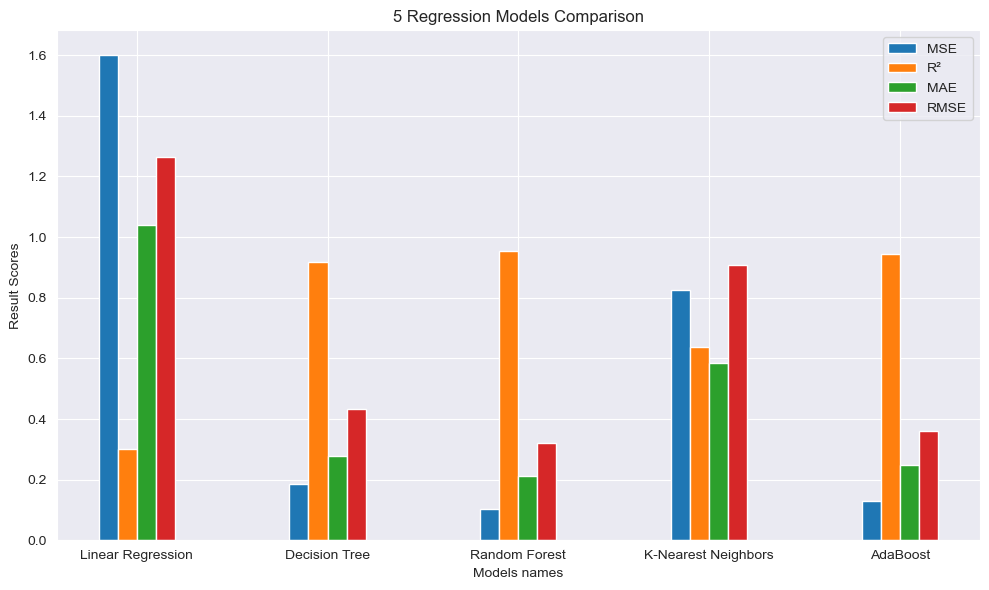

In [27]:
# Plotting the results

metrics = ['MSE', 'R²', 'MAE', 'RMSE']
num_models = len(results_df)
num_metrics = len(metrics)
bar_width = 0.1
index = np.arange(num_models)

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, results_df[metric], bar_width, label=metric)

ax.set_xlabel('Models names')
ax.set_ylabel('Result Scores')
ax.set_title('5 Regression Models Comparison')
ax.set_xticks(index + bar_width * (num_metrics - 1) / 2)
ax.set_xticklabels(results_df['Model'])
ax.legend()

plt.tight_layout()
plt.show()

The comparison of results reveals that the Random Forest model consistently demonstrates superior performance relative to the other models evaluated. Its ability to effectively capture complex patterns in the data, combined with its robustness against overfitting, positions it as the most effective regression algorithm among those tested. This finding underscores the advantages of utilizing Random Forest in predictive modeling tasks, where accuracy and reliability are paramount.

## Step 4. Results intepretation
During this step, I will interpret the results and analyse which features contribute the most to predicting the `restaurant ratings`

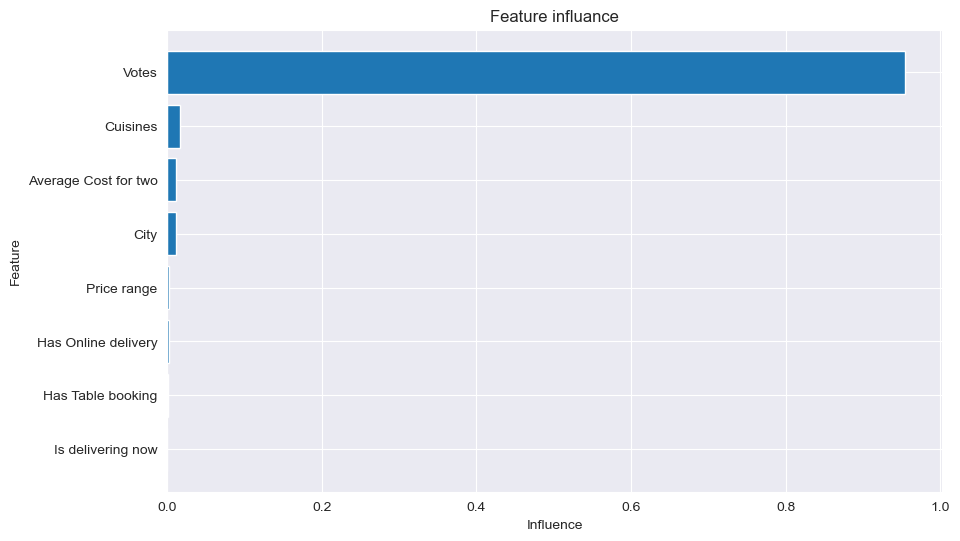

In [28]:
# Calculate feature importances

influence = model_rf.feature_importances_

# Create a DataFrame for visualization

influencial_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': influence})
influencial_features = influencial_features.sort_values(by='Importance', ascending=False)

# Plot feature influence
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(influencial_features['Feature'], influencial_features['Importance'])
plt.xlabel('Influence')
plt.ylabel('Feature')
plt.title('Feature influance')
plt.gca().invert_yaxis()
plt.show()

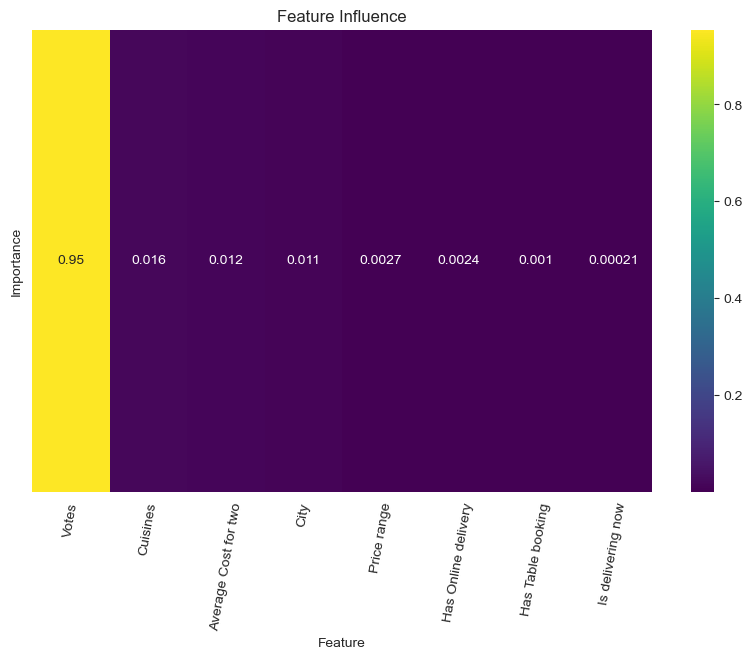

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(influencial_features.set_index('Feature').T, annot=True, cmap='viridis', cbar=True)
plt.xticks(rotation= 80)
plt.title('Feature Influence')
plt.show();

The figures `Feature influence` indicate that the number of Votes make use of the most significant influence on restaurant ratings. While other factors like Cuisines, Average cost of two and city also play a role, their influence is secondary to that of customer feedback. This highlights the importance of encouraging customer participation to improve restaurant ratings and visibility in a competitive market, and suggests that customer engagement reflected by the volume of the votes, plays a crucial role in determining how restaurants are perceived and rated by the model. Such findings highlight the importance of customer feedback mechanisms in shaping the overall ratings within the restaurant industry.

In [30]:
# Now I am going to save my model
import os
import joblib

# Creates model directory
model_directory = "Models"
os.makedirs(model_directory, exist_ok=True) 

model_save = joblib.dump(model_rf, os.path.join(model_directory, 'random_forest_model.joblib'))
print(f"model saved: {model_save}")

# Save the label encoders for decoding later
encoder_save = joblib.dump(label_encoder, 'label_encoders.pkl')
print(f"encoder saved: {encoder_save}")

# Save the scaler for inverse transformation
scaler_save = joblib.dump(scalar, 'scaler.pkl')
print(f"scaler saved: {scaler_save}")

model saved: ['Models\\random_forest_model.joblib']
encoder saved: ['label_encoders.pkl']
scaler saved: ['scaler.pkl']
